# ARTIFICIAL NEURAL NETWORK (ANN)

In this notebook i am using MNIST data set to classify the handwritten digits. I am using a Artificial Neural network

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## LOADING THE DATA 

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print("Traning Set")
print(train.shape)
print("Test set")
print(test.shape)

Traning Set
(42000, 785)
Test set
(28000, 784)


In the train data the first column is label and each image is 28*28 pixel by pixel image. Then from 2nd column to last column that is 784 columns represent the pixel values of each image. There are totally 42000 images in the train data set.

The test data is same but only the label column is not present. the size of test is 28000

In [3]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train and Test Matrices 

In [5]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

X_test=test.iloc[:,:].values

print("Train data shape : (%d,%d)"% X.shape)
print("Train Labels : (%d,)"% y.shape)
print("Test Data shape : (%d,%d)"% X_test.shape)

Train data shape : (42000,784)
Train Labels : (42000,)
Test Data shape : (28000,784)


## VISUALIZATION OF THE DATA

In [6]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

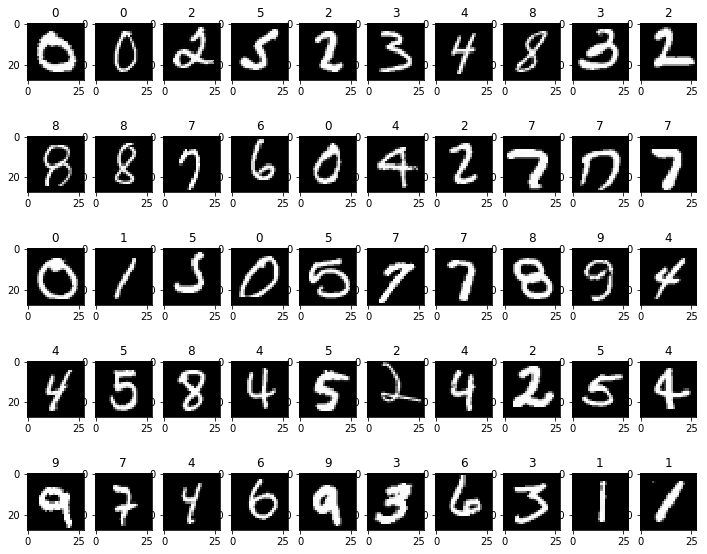

In [7]:
 %matplotlib inline
plt.figure(figsize=(12,10))

z, x = 5,10
for i in range(0,(z*x)):
    plt.subplot(z, x, i+1)
    k = np.random.randint(0,X.shape[0],1)[0]
    show_image(X[k,:],(28,28), y[k], cmp="gist_gray")
plt.show()

## DATA PREPROCESSING

We normalize the train data and test data and we do this by dividing the data by 255. This is equal to (max-min) of the pixel values

In [8]:
X=X/255
X_test=X_test/255
print("min value :%d"% np.min(X))
print("max value :%d"% np.max(X))

min value :0
max value :1


In the train data and test data there are no missing values. So there is no need to clean the data 

In [9]:
train.isnull().any().sum()

0

In [10]:
test.isnull().any().sum()

0

## ONE HOT ENCODING

We have actually classes named 0 to 9. But When we are training the data using neural network we have to make the dummies of the classes.It is really useful for classifying.

For Example:

y=1 is changed to y=[0 1 0 0 0 0 0 0 0 0]

y=2 is changed to y=[0 0 1 0 0 0 0 0 0 0]

and so on.

In [11]:
# first we will print y's
print(y[0:10])

[1 0 1 4 0 0 7 3 5 3]


For one hot encoding we will use the onehotencoder from sklearn preprocessing library

In [12]:
from sklearn.preprocessing import OneHotEncoder
x=y.reshape(y.size,1)
onehotencoder=OneHotEncoder(categorical_features=[0])
y=onehotencoder.fit_transform(x).toarray().astype(int)
print("SHAPE : (%d,%d)\n" %y.shape)
print(y[0:10,:])

SHAPE : (42000,10)

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]


## CROSS-VALIDATION

The cross-validation is a techinique used for measure the accuracy and visualizing overfitting. 

Here we will split the data into training set and cross validation set with size of cross-validation as 10% of total data 

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_cross,y_train,y_cross=train_test_split(X,y,test_size=0.1,random_state=42)

print("Train Size (%d,%d) \n"% X_train.shape)
print("Cross Size (%d,%d) \n"% X_cross.shape)
print("Train Label Size (%d,%d) \n"% y_train.shape)
print("Cross Label Size (%d,%d) \n"% y_cross.shape)

Train Size (37800,784) 

Cross Size (4200,784) 

Train Label Size (37800,10) 

Cross Label Size (4200,10) 



## BUILDING THE MODEL

For Neural network building i am using python keras library.

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD,Adam
from keras.constraints import max_norm

Using Theano backend.


## Activation Function:

Exist a lot of types of activations functions, but in this model we'll use the ReLu (Rectifier Linear Function) for hidden layers and Softmax function for output layer

Softmax function is same as sigmoid function but softmax is for more varaibles that is it is generalization of sigmoid function on a n-dimensional vector 

## LAYERS:

In this notebook we will use a Neural Network with 3 layer, 1024-1024 Hidden Units and categorical Cross-Entropy as Loss Function 

## METRICS:

Here we will use accuracy as a metric 

and Lastly we will use Stochastic Gradient Descent algorithm for optimizing the function ( Same as adam)

## DROPOUT 
In neural net's dropout is a way to prevent overfitting. 

You can read more on this in the reasearch paper : "Dropout: A Simple Way to Prevent Neural Networks from
Overfitting" by hinton

Here i am using a 0.5 keep_prob (probability of keeping the neurons). I have used 0.25 also but with 0.5 the accuracy slightly increased. 

also tried p=0.8 dropout on input shape. Not a good result 

## Final model
 
So Our neural network will be  (The 10NN is the output layer)

INPUT LAYER- 1024NN  - DROPOUT - 1024NN - DROPOUT - 10NN

Bascially I am trying with 0.7 dropout and results were not good.
The best model was 2 hidden layers with 1024 in 

I have also tried this model:

INPUTLAYER- 500NN - DROPOUT(p=0.2) - 300NN - DROPOUT(p=0.2) - 10NN and i got a accuracy of 97.985% on test data.

INPUTLAYER - 1024NN - DROPOUT(0.5) - 1024NN - DROPOUT(0.5) - 10NN and got a accuracy of 98.100 with epochs=40.

INPUTLAYER - 1024NN - DROPOUT(0.3) - (3 layers ) -10NN and got accuracy of 98.142.



In [33]:
# Initialising the ANN
model=Sequential()

# adding dropout of 0.8 in the input layer      

# adding the input layer and first hidden layer
model.add(Dense(1024,input_shape=(784,),activation='relu'))

# dropout layer
model.add(Dropout(0.7))

# adding the second hidden layer
model.add(Dense(1024,activation='relu'))

# dropout layer
model.add(Dropout(0.7))

# adding the third hidden layer
# model.add(Dense(1024,activation='relu',kernel_constraint=max_norm(2.)))

#dropout 
# model.add(Dropout(0.5))
        
# adding the output layer
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [34]:
# compling the model

# defining the optimizier                           (used adam and getting 94%)
# sgd=SGD(lr=0.1, momentum=0.9, decay=0.1, nesterov=False)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [36]:
# fitting the Model
model.fit(X_train,y_train,batch_size=100,epochs=15,validation_data=(X_cross,y_cross))

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37800/37800 [==============================] - 27s 711us/step - loss: 0.0858 - acc: 0.9761 - val_loss: 0.0852 - val_acc: 0.9769
Epoch 2/15
37800/37800 [==============================] - 28s 740us/step - loss: 0.0872 - acc: 0.9761 - val_loss: 0.0869 - val_acc: 0.9776
Epoch 3/15
37800/37800 [==============================] - 28s 728us/step - loss: 0.0824 - acc: 0.9765 - val_loss: 0.0880 - val_acc: 0.9776
Epoch 4/15
37800/37800 [==============================] - 28s 748us/step - loss: 0.0841 - acc: 0.9774 - val_loss: 0.0782 - val_acc: 0.9790
Epoch 5/15
37800/37800 [==============================] - 29s 761us/step - loss: 0.0806 - acc: 0.9769 - val_loss: 0.0792 - val_acc: 0.9786
Epoch 6/15
37800/37800 [==============================] - 27s 724us/step - loss: 0.0792 - acc: 0.9778 - val_loss: 0.0785 - val_acc: 0.9802
Epoch 7/15
37800/37800 [==============================] - 28s 737us/step - loss: 0.0841 - acc: 0.9775 - val_loss: 0.0

## PREDICTIONS 

Predict_classes function in keras directly predict the classes. 

In [25]:
y_pred=model.predict_classes(X_test)
print(y_pred.shape)
print('\n')
print('\n')
print(y_pred[0:10])

28000/28000 [==============================] - 8s 301us/step
(28000,)




[2 0 9 9 3 7 0 3 0 3]


## VISUALIZING THE TEST RESULTS

Here we are visulizing the 20 random test images. The title of each image is the predicted label

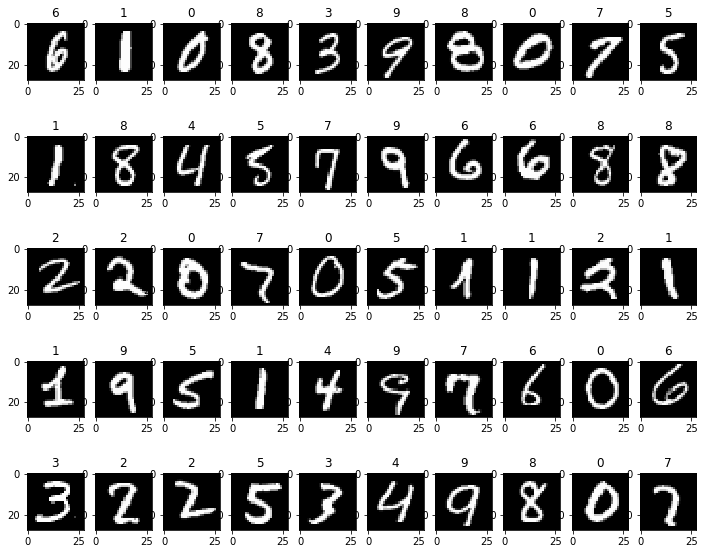

In [26]:
 %matplotlib inline
plt.figure(figsize=(12,10))

z, x = 5,10
for i in range(0,(z*x)):
    plt.subplot(z, x, i+1)
    k = np.random.randint(0,X_test.shape[0],1)[0]
    show_image(X_test[k,:],(28,28), y_pred[k], cmp="gist_gray")
plt.show()

In [27]:
imageid=np.linspace(1,28000,28000).astype(int)
print(imageid,imageid.shape,type(imageid))


[    1     2     3 ..., 27998 27999 28000] (28000,) <class 'numpy.ndarray'>


In [28]:
ans=pd.DataFrame({
    "ImageId":imageid,
    "Label":y_pred
})
ans.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [29]:
ans.to_csv("ANN.csv",index=False)                # got 98.100% accuracy.
print("Done")                          

Done
